# Ford Go-Bike 2018 User Behavior Trends & Analysis
## by Hussain Balhareth

## Investigation Overview

> I selected Ford GoBike dataset in order to investigate and analyse the business from different perspectives. Depending on the data available, I was curious to raise and keep raising questions that I was able to answer using different sort of visualization tools. I eventually presented a few graphs that I believe are going to give the audience a great hint at the amount of insights we could draw from such raw data.

## Dataset Overview

> Initially, there are 1,863,721 bike trips in the dataset with 16 features in 2 main data types, string and numeric. Some of the main features of interest i found was user behavior time based (whether member or casual, young,midage or olders). The main variable is the duration and its variation duration different time of day, day of week, and month of year. The data is still needs to be wrangled and cleaned before it's ready for analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 20)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'none'})

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data_clean.csv', )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714549 entries, 0 to 1714548
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   bike_id           int64  
 1   user_type         object 
 2   member_gender     object 
 3   age               int64  
 4   age_group         object 
 5   duration_min      float64
 6   start_time        object 
 7   start_hour        int64  
 8   start_day         object 
 9   start_month       object 
 10  end_time          object 
 11  end_hour          int64  
 12  end_day           object 
 13  end_month         object 
 14  start_station_id  int64  
 15  end_station_id    int64  
dtypes: float64(1), int64(6), object(9)
memory usage: 209.3+ MB


In [3]:
# set data types
df['bike_id'] = df['bike_id'].astype(str)
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)

df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['age'] = df['age'].astype('uint16')

df['duration_min'] = pd.to_numeric(df['duration_min'], downcast='float')

df['start_time'] = df['start_time'].astype('datetime64')
df['end_time'] = df['end_time'].astype('datetime64')



In [4]:
# set data types

# create an ordinal categorical time variables
age_group = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", 
             "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", 
             "75-79", "80-84", "85-89", "90-94", "95-99", "100+"]
hours = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
         '10', '11', '12', '13', '14', '15', '16', '17', 
         '18', '19', '20', '21', '22', '23']
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# 1st set two columns to str to match hours dtype
df.start_hour = df.start_hour.astype(str)
df.end_hour = df.end_hour.astype(str)

# assign the categories to each column name
ordinal_var_dict = {'age_group':age_group,
                    'start_hour' : hours,
                    'end_hour' : hours,
                    'start_day': weekdays,
                    'end_day': weekdays,
                    'start_month': months,
                    'end_month': months}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [5]:
# create DataFrames by dtype

# string
df_str = df.select_dtypes(include= object)
print('df_str =',list(df_str.columns))

# numeric
df_num = df.select_dtypes(include= ['uint16','float32'])
print('df_num =',list(df_num.columns))

# datetime
df_time = df.select_dtypes(include= 'datetime64')
print('df_time =',list(df_time.columns))

# category
df_cat = df.select_dtypes(include= 'category')
print('df_cat =',list(df_cat.columns))

df_str = ['bike_id', 'start_station_id', 'end_station_id']
df_num = ['age', 'duration_min']
df_time = ['start_time', 'end_time']
df_cat = ['user_type', 'member_gender', 'age_group', 'start_hour', 'start_day', 'start_month', 'end_hour', 'end_day', 'end_month']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714549 entries, 0 to 1714548
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   bike_id           object        
 1   user_type         category      
 2   member_gender     category      
 3   age               uint16        
 4   age_group         category      
 5   duration_min      float32       
 6   start_time        datetime64[ns]
 7   start_hour        category      
 8   start_day         category      
 9   start_month       category      
 10  end_time          datetime64[ns]
 11  end_hour          category      
 12  end_day           category      
 13  end_month         category      
 14  start_station_id  object        
 15  end_station_id    object        
dtypes: category(9), datetime64[ns](2), float32(1), object(3), uint16(1)
memory usage: 89.9+ MB


_______

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Use count & percentage by user type & gender

> Here I observe that more than 88% of users are subscribers and more than 73% are male users.

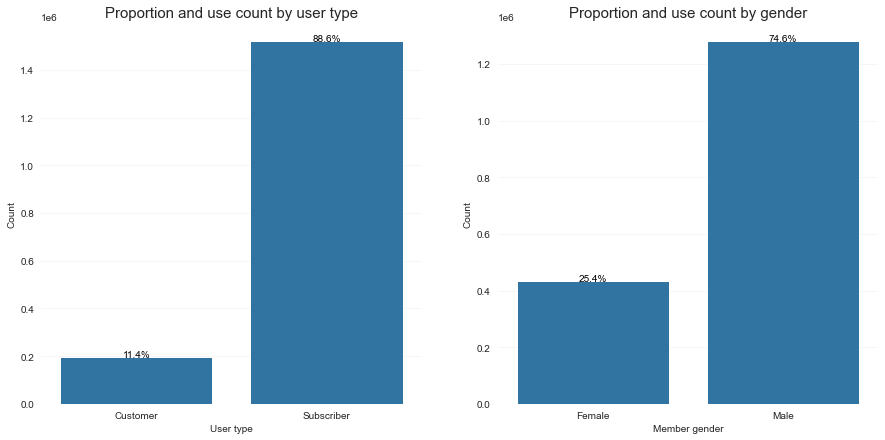

In [7]:
# create a figure and set size

plt.figure(figsize=(15,7))

# ---------------------------------------------------
plt.subplot(121)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('User type')
plt.ylabel('Count')
plt.title('Proportion and use count by user type', size=15);
# ------------------------------------------------------------- 
plt.subplot(122)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'member_gender', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('Member gender')
plt.ylabel('Count')
plt.title('Proportion and use count by gender', size=15);

In [8]:
df[['bike_id','user_type']].groupby(by='user_type').count()

,bike_id
user_type,
Customer,195134
Subscriber,1519415


In [9]:
df[['bike_id','member_gender']].groupby(by='member_gender').count()

,bike_id
member_gender,
Female,435010
Male,1279539


________________________________

## Mean duration by user type & gender

> Here I observe that the mean duration of use by user type is different than the count perspective where the casual customer is >25 minutes while the subscriber is 11 minutes on average.
Also, I observe that females spent the most on average with 14.6 minutes.

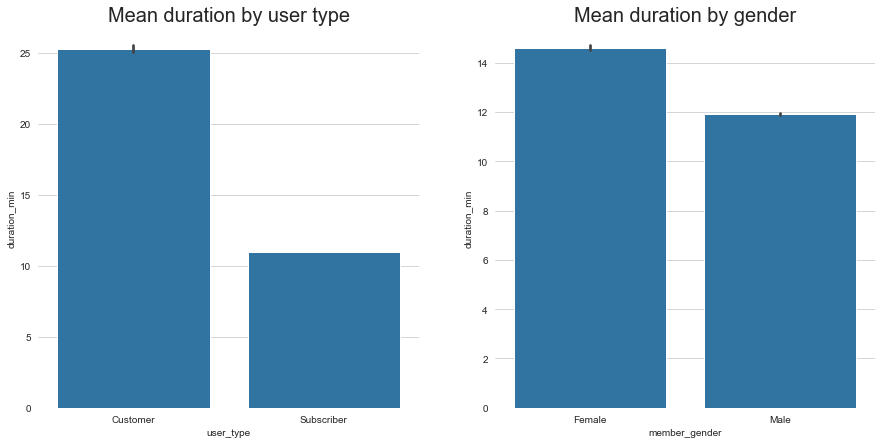

In [10]:
plt.figure(figsize=(15,7))

# mean duration (min) by user type: member vs. casual
plt.subplot(121)
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'user_type', y = 'duration_min', color = base_color)
plt.title('Mean duration by user type',size = 20);

# mean duration (min) by gender: male vs. female
plt.subplot(122)
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'member_gender', y = 'duration_min', color = base_color)
plt.title('Mean duration by gender',size = 20);

In [11]:
df[['user_type', 'duration_min']].groupby(by='user_type').mean()

,duration_min
user_type,
Customer,25.29
Subscriber,10.98


In [12]:
df[['member_gender', 'duration_min']].groupby(by='member_gender').mean()

,duration_min
member_gender,
Female,14.61
Male,11.93


____________________________

## Use count & percentage by Age group

> Here I observe that the group of majority use is '30-34' followed by '25-29'

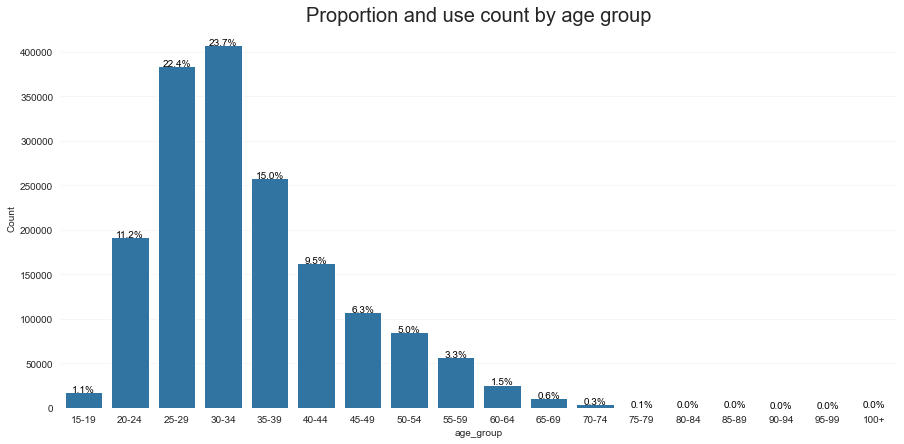

In [13]:
# create the plot

plt.figure(figsize=(15,7))

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'age_group', color = base_color, order=age_group)

# add annotations
n_points = df.shape[0]
cat_counts = df['age_group'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('age_group')
plt.ylabel('Count')
plt.title('Proportion and use count by age group', size=20);

__________

## Mean duration vs. Age group

> Here we observe a different story compared to age groups by count '15-19' is the dominant age group in terms of average duration followed by '80-84' age group with '85-89' being the lowest.

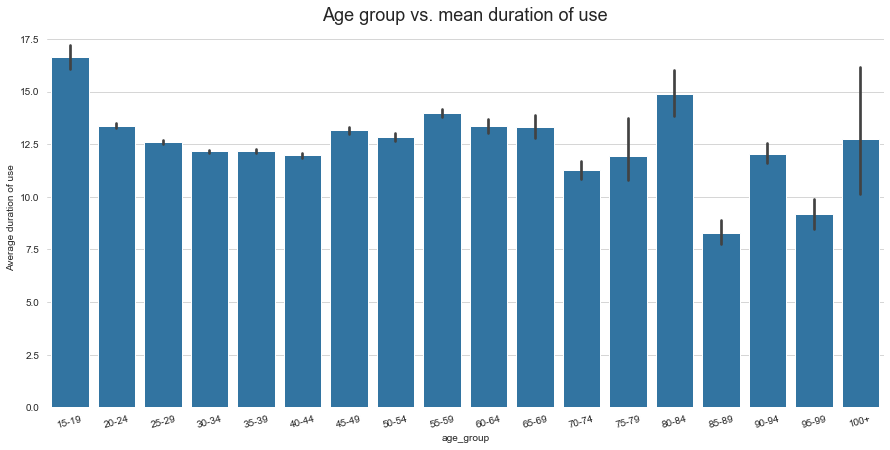

In [14]:
plt.figure(figsize=(15,7))

base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'age_group', y = 'duration_min', color = base_color)
plt.xticks(rotation = 15)
plt.ylabel('Average duration of use')
plt.title('Age group vs. mean duration of use', size = 18)

plt.show()

In [15]:
df[['age_group','duration_min']].groupby(by='age_group').mean()

,duration_min
age_group,
15-19,16.65
20-24,13.39
25-29,12.60
30-34,12.16
35-39,12.19
40-44,11.97
45-49,13.16
50-54,12.82
55-59,13.98


_______

## Duration vs. user type per gender

> This visualisation tells the same story as the heatmap that the female customers have the highest mean duration.

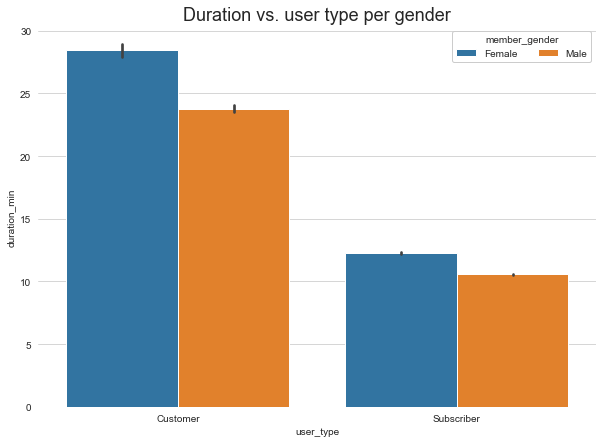

In [16]:
plt.figure(figsize=(10,7))
ax = sb.barplot(data = df, x = 'user_type', y = 'duration_min', hue = 'member_gender')
ax.legend(loc = 'best', ncol = 3, framealpha = 1, title = 'member_gender');

plt.title('Duration vs. user type per gender',size=18);

In [17]:
df[['user_type','member_gender','duration_min']].groupby(by=['user_type','member_gender']).mean()

duration_min
user_type  member_gender              
Customer   Female                28.43
           Male                  23.78
Subscriber Female                12.26
           Male                  10.57

_______

## Use count & percentage per Weekday

> Here I observe that the midweek has the largest proportion of use amongt the other weekdays, namely, Tuesdays, Wednesdays and Thursdays.

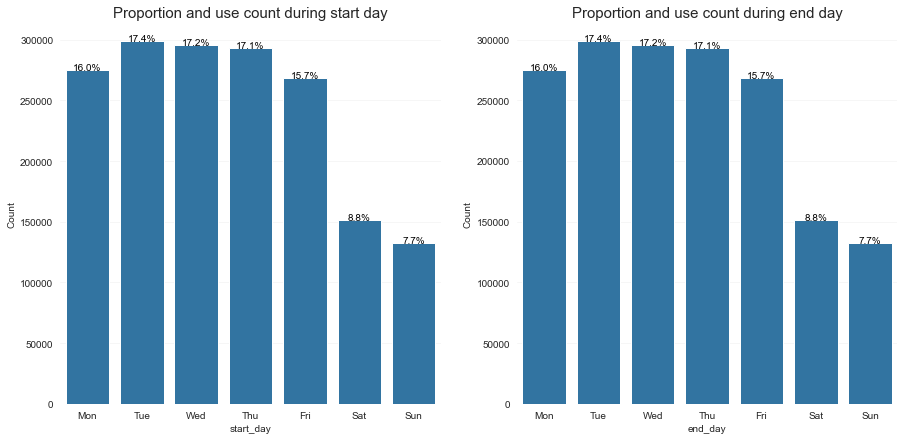

In [18]:
# create the plot

plt.figure(figsize=(15,7))

plt.subplot(121)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_day', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['start_day'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('start_day')
plt.ylabel('Count')
plt.title('Proportion and use count during start day', size=15);
#---------------------------------------------------------------------------
plt.subplot(122)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'end_day', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['end_day'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('end_day')
plt.ylabel('Count')
plt.title('Proportion and use count during end day', size=15);

________

## Use count per weekday by user type

> Another look at the use count behavior of both customer and subscriber along the weekdays. We notice a drop on the weekends for the subscribers while the trend in customers is more steady although smaller.

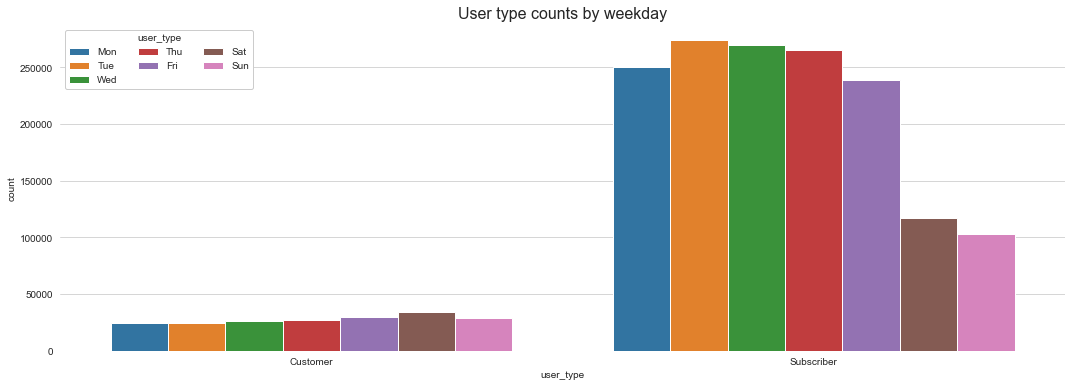

In [19]:
plt.figure(figsize=(18,6))
ax = sb.countplot(data = df, x = 'user_type', hue = 'start_day', hue_order=weekdays)
ax.legend(loc = 'best', ncol = 3, framealpha = 1, title = 'user_type')
plt.title('User type counts by weekday', size = 16)

plt.show()

__________

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slide_deck_fordgobike.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_fordgobike.ipynb to slides
[NbConvertApp] Writing 499461 bytes to slide_deck_fordgobike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_fordgobike.slides.html
Use Control-C to stop this server
